In [21]:
# Diego Galindo, Francisco Mercado

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [22]:
def check_outlier(column, dataset):
    q1 = np.quantile(dataset[column].values, .25)
    q3 = np.quantile(dataset[column].values, .75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr

    # Crear una lista para almacenar si es o no outlier
    is_outlier_list = []
    for value in dataset[column].values:
        if value <= high and value >= low:
            is_outlier_list.append(0)
        else:
            is_outlier_list.append(1)
    
    return is_outlier_list

In [4]:
df_data = pd.read_csv("../results/1_check_raw_data.csv")
df_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [23]:
df_summary_null = df_data.isnull().sum()
df_summary_null = pd.DataFrame(df_summary_null, columns=["null"])
df_summary_null["not-null"] = df_data.shape[0] - df_summary_null["null"]
df_summary_null

,null,not-null
Pregnancies,0,768
Glucose,0,768
BloodPressure,0,768
SkinThickness,0,768
Insulin,0,768
BMI,0,768
DiabetesPedigreeFunction,0,768
Age,0,768
Outcome,0,768


In [24]:
df_data_not_null = df_data.dropna()

/tmp/ipykernel_87408/991910896.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_data_not_null, x="Glucose", palette="pastel")


<Axes: xlabel='Glucose'>

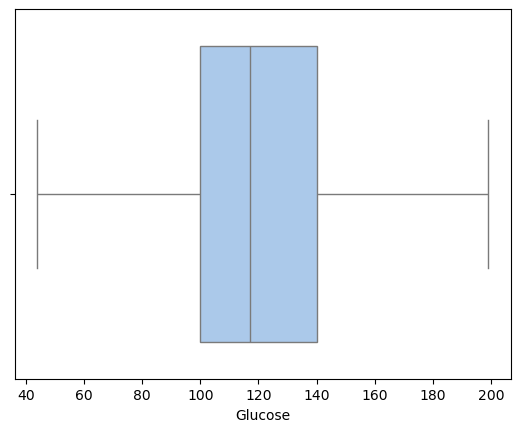

In [25]:
sns.boxplot(data=df_data_not_null, x="Glucose", palette="pastel")

In [26]:
df_data_not_null = df_data_not_null.reset_index(drop=True)

In [27]:
df_outliers = pd.DataFrame()

# Aplicar el método de detección de outliers a cada columna
for column in df_data_not_null.columns:
    if column != 'Outcome':  # Evitamos incluir Outcome ya que es la variable objetivo
        df_outliers[f"{column}_outlier"] = check_outlier(column, df_data_not_null)

# Concatenar los resultados de outliers con el dataset original
df_concat = pd.concat([df_data_not_null, df_outliers], axis=1)

# Resumen de outliers por cada columna
matrix_summary = []
for column in df_concat.columns:
    if "outlier" in column:
        value_counts = df_concat[column].value_counts()
        row = [column, 0, 0]
        if 1 in value_counts.index:
            row[1] = int(value_counts[1])
        if 0 in value_counts.index:
            row[2] = int(value_counts[0])
        matrix_summary.append(row)

df_summary_outlier = pd.DataFrame(data=matrix_summary, columns=["feature", "outlier", "not-outlier"])
df_summary_outlier.sort_values(by="outlier", ascending=False)

,feature,outlier,not-outlier
4,Insulin_outlier,164,604
3,SkinThickness_outlier,87,681
6,DiabetesPedigreeFunction_outlier,29,739
2,BloodPressure_outlier,14,754
7,Age_outlier,9,759
5,BMI_outlier,8,760
0,Pregnancies_outlier,4,764
1,Glucose_outlier,0,768


In [28]:
df_concat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_outlier,Glucose_outlier,BloodPressure_outlier,SkinThickness_outlier,Insulin_outlier,BMI_outlier,DiabetesPedigreeFunction_outlier,Age_outlier
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,0,0,0,0,0,0,0,0
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,0,0,0,0,0,0,0,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,0,0,0,0,0,0,0,0
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,0,0,0,0,0,0,0,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,0,0,0,0,0,0,1,0


In [29]:
df_concat[df_concat["BloodPressure_outlier"] == 1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_outlier,Glucose_outlier,BloodPressure_outlier,SkinThickness_outlier,Insulin_outlier,BMI_outlier,DiabetesPedigreeFunction_outlier,Age_outlier
18,1,103.0,30.0,38.00000,83.000000,43.3,0.183,33,0,0,0,1,0,0,0,0,0
43,9,171.0,110.0,24.00000,240.000000,45.4,0.721,54,1,0,0,1,0,1,0,0,0
84,5,137.0,108.0,29.15342,155.548223,48.8,0.227,37,1,0,0,1,0,0,0,0,0
106,1,96.0,122.0,29.15342,155.548223,22.4,0.207,27,0,0,0,1,0,0,0,0,0
125,1,88.0,30.0,42.00000,99.000000,55.0,0.496,26,1,0,0,1,0,0,1,0,0
177,0,129.0,110.0,46.00000,130.000000,67.1,0.319,26,1,0,0,1,1,0,1,0,0
362,5,103.0,108.0,37.00000,155.548223,39.2,0.305,65,0,0,0,1,0,0,0,0,0
549,4,189.0,110.0,31.00000,155.548223,28.5,0.680,37,0,0,0,1,0,0,0,0,0
597,1,89.0,24.0,19.00000,25.000000,27.8,0.559,21,0,0,0,1,0,1,0,0,0
599,1,109.0,38.0,18.00000,120.000000,23.1,0.407,26,0,0,0,1,0,0,0,0,0


In [30]:
df_concat[df_concat["Insulin_outlier"] == 1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_outlier,Glucose_outlier,BloodPressure_outlier,SkinThickness_outlier,Insulin_outlier,BMI_outlier,DiabetesPedigreeFunction_outlier,Age_outlier
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,0,0,0,1,1,0,0,0
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1,0,0,0,0,1,0,0,0
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1,0,0,0,1,1,0,0,0
20,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0,0,0,0,0,1,0,0,0
31,3,158.0,76.0,36.0,245.0,31.6,0.851,28,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,0,134.0,58.0,20.0,291.0,26.4,0.352,21,0,0,0,0,0,1,0,0,0
715,7,187.0,50.0,33.0,392.0,33.9,0.826,34,1,0,0,0,0,1,0,0,0
747,1,81.0,74.0,41.0,57.0,46.3,1.096,32,0,0,0,0,0,1,0,0,0
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1,0,0,0,1,1,0,0,0


In [31]:
df_concat[df_concat["SkinThickness_outlier"] == 1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_outlier,Glucose_outlier,BloodPressure_outlier,SkinThickness_outlier,Insulin_outlier,BMI_outlier,DiabetesPedigreeFunction_outlier,Age_outlier
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,0,0,0,1,1,0,0,0
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1,0,0,0,1,1,0,0,0
32,3,88.0,58.0,11.0,54.0,24.8,0.267,22,0,0,0,0,1,1,0,0,0
39,4,111.0,72.0,47.0,207.0,37.1,1.390,56,1,0,0,0,1,1,0,1,0
50,1,103.0,80.0,11.0,82.0,19.4,0.491,22,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,4,127.0,88.0,11.0,155.0,34.5,0.598,28,0,0,0,0,1,0,0,0,0
710,3,158.0,64.0,13.0,387.0,31.2,0.295,24,0,0,0,0,1,1,0,0,0
718,1,108.0,60.0,46.0,178.0,35.5,0.415,24,0,0,0,0,1,0,0,0,0
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1,0,0,0,1,1,0,0,0


In [41]:
isolation_forest = IsolationForest()
isolation_forest.fit(df_data_not_null.drop(columns=["Outcome"]))

# Predecir outliers con Isolation Forest
df_data_not_null["is_isolated"] = isolation_forest.predict(df_data_not_null.drop(columns=["Outcome"]))

# Contar los valores detectados por Isolation Forest
df_data_not_null["is_isolated"].value_counts()



is_isolated
 1    653
-1    115
Name: count, dtype: int64

In [42]:
local_outlier_factor = LocalOutlierFactor()
df_data_not_null["is_lof"] = local_outlier_factor.fit_predict(df_data_not_null.drop(columns=["Outcome"]))

# Contar los valores detectados por Local Outlier Factor
df_data_not_null["is_lof"].value_counts()

is_lof
 1    744
-1     24
Name: count, dtype: int64

In [43]:
df_data_not_null.groupby(["is_isolated", "is_lof"]).count()

Pregnancies  Glucose  BloodPressure  SkinThickness  \
is_isolated is_lof                                                       
-1          -1               24       24             24             24   
             1               91       91             91             91   
 1           1              653      653            653            653   

                    Insulin  BMI  DiabetesPedigreeFunction  Age  Outcome  
is_isolated is_lof                                                        
-1          -1           24   24                        24   24       24  
             1           91   91                        91   91       91  
 1           1          653  653                       653  653      653

In [44]:
df_data_not_null.to_csv("../results/2_check_outliers.csv", index=False)